In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

THRESHOLD = 488

# Read data from the Excel file into a pandas DataFrame
data = pd.read_excel('Data sheet.xlsx', sheet_name='Sheet1')

# Prepare the data
X = data[['DIM( Days In Milk)','Avg(7 days). Daily MY( L )', 'Kg. milk 305 ( Kg )', 'Fat (%)' , 'SNF (%)', 'Density ( Kg/ m3','Protein (%)','Conductivity (mS/cm)','pH','Freezing point (⁰C)','Salt (%)','Lactose (%)']]
y = data['SCC (103cells/ml)'].apply(lambda x: 1 if x > THRESHOLD else 0)

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
import category_encoders as ce # Import the relevant library
encoder = ce.OrdinalEncoder(cols=['DIM( Days In Milk)','Avg(7 days). Daily MY( L )', 'Kg. milk 305 ( Kg )', 'Fat (%)' , 'SNF (%)', 'Density ( Kg/ m3','Protein (%)','Conductivity (mS/cm)','pH','Freezing point (⁰C)','Salt (%)','Lactose (%)'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Create decision treeclassifier object
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0) # Use the gini index as the criterion
clf_gini.fit(X_train, y_train) # Train the classifier

y_pred = clf_gini.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6497175141242938
Precision: 0.0
Recall: 0.0
F1-score: 0.0


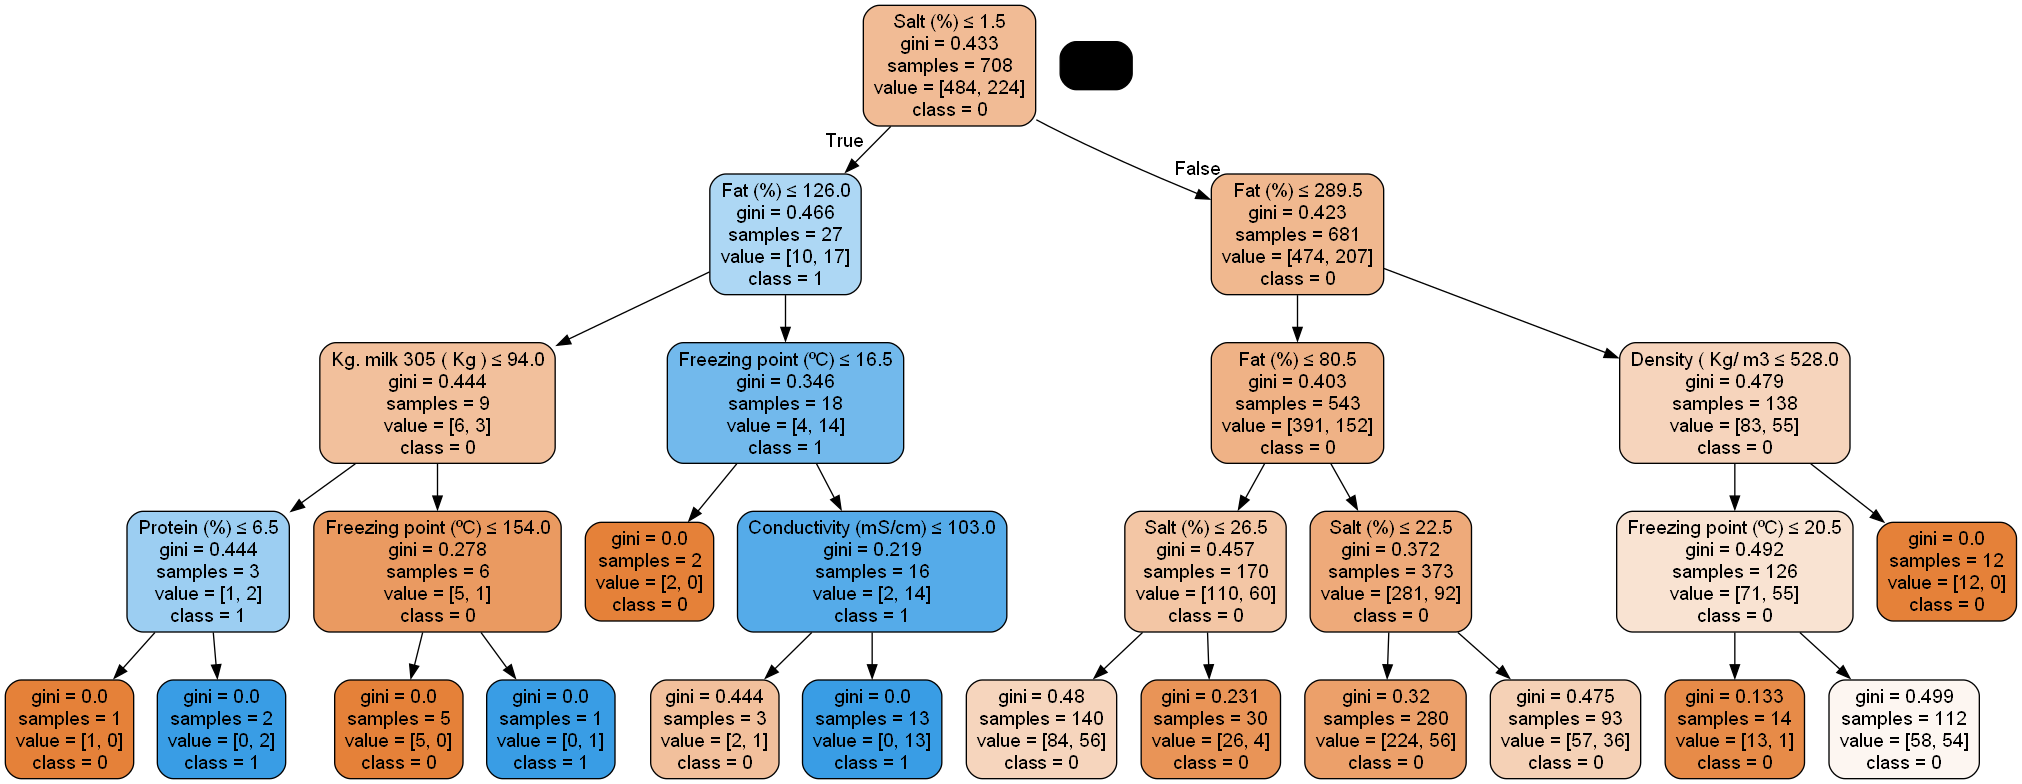

In [51]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(clf_gini,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names=X.columns,
class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('model.png')
Image(graph.create_png())